In [227]:
import pandas as pd
from pandas.plotting import scatter_matrix

### Load oustide data sets

In [206]:
vodka_df = pd.read_pickle('../data/vodka_df.pkl')
grad_rate = pd.read_csv('../data/grad_county.csv')
unemp_rate = pd.read_csv('../data/unemployment_rate.csv')
voter_reg = pd.read_csv('../data/vote_reg.csv')

### Preprocess outside data sets

In [207]:
unemp_rate = unemp_rate[(unemp_rate['Year'] >= 2012) & (unemp_rate['Year'] <= 2018)]
unemp_rate.rename({'Year': 'year', 'UNEMPLOYMENT RATE': 'unemp_rate'}, axis = 1, inplace=True)
unemp_rate['county'] = unemp_rate['county'].str.upper()
unemp_grouped = unemp_rate.groupby(['county', 'year', 'quarter'])['unemp_rate'].mean().reset_index()

In [208]:
grad_rate.rename({'County Name': 'county', 'Graduation Rate': 'graduation_rate'}, axis=1, inplace=True)
grad_rate.dropna(inplace=True)
grad_rate['county'] = grad_rate['county'].str.upper()

In [210]:
voter_reg.rename({'County': 'county'}, axis=1, inplace=True)
voter_reg['county'] = voter_reg['county'].str.upper()

voter_grouped = voter_reg.groupby(['county', 'year', 'quarter'])[['prct_dem', 'prct_rep', 'prct_NP']].mean().reset_index()
voter_grouped = voter_grouped[(voter_grouped['year'] >= 2012) & (voter_grouped['year'] <= 2018)]



### Merge outside data sets to vodka_df

In [211]:
merged_vodka_df = vodka_df.merge(grad_rate, on=['county', 'year'], how='left')

In [212]:
merged_vodka_df = merged_vodka_df.merge(unemp_grouped, on=['county', 'year', 'quarter'])

In [213]:
merged_vodka_df  = merged_vodka_df.merge(voter_grouped, on=['county', 'year', 'quarter'])

In [214]:
merged_vodka_df

,county,year,quarter,category,avg_bottle_volume,avg_percent_markup,num_unique_stores_per_capita,num_unique_vendors_per_capita,avg_bottle_volume_sold_per_capita,graduation_rate,unemp_rate,prct_dem,prct_rep,prct_NP
0,ADAIR,2012,1,amaretto,0.916667,0.500742,0.000803,0.000536,0.001540,95.6,5.300000,0.221747,0.385196,0.392881
1,ADAIR,2012,1,brandy,0.660088,0.368355,0.003053,0.003053,0.004614,95.6,5.300000,0.221747,0.385196,0.392881
2,ADAIR,2012,1,cocktail,1.638889,0.512525,0.002066,0.001549,0.004969,95.6,5.300000,0.221747,0.385196,0.392881
3,ADAIR,2012,1,creme,0.750000,0.500000,0.000134,0.000134,0.000234,95.6,5.300000,0.221747,0.385196,0.392881
4,ADAIR,2012,1,gin,0.976562,0.499606,0.001224,0.000918,0.001329,95.6,5.300000,0.221747,0.385196,0.392881
5,ADAIR,2012,1,other,0.750000,0.500000,0.000134,0.000134,0.000251,95.6,5.300000,0.221747,0.385196,0.392881
6,ADAIR,2012,1,rum,1.031504,0.496610,0.011529,0.013176,0.010761,95.6,5.300000,0.221747,0.385196,0.392881
7,ADAIR,2012,1,schnapps,0.724085,0.494052,0.007686,0.005490,0.005244,95.6,5.300000,0.221747,0.385196,0.392881
8,ADAIR,2012,1,tequila,0.657895,0.509096,0.001413,0.001696,0.000664,95.6,5.300000,0.221747,0.385196,0.392881
9,ADAIR,2012,1,triple sec,0.750000,0.499249,0.000268,0.000134,0.000351,95.6,5.300000,0.221747,0.385196,0.392881


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1292cc208>,
      dtype=object)

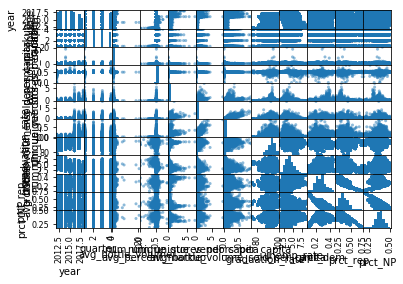

In [229]:
scatter_matrix(merged_vodka_df)

In [221]:
merged_vodka_df.corr()

,year,quarter,avg_bottle_volume,avg_percent_markup,num_unique_stores_per_capita,num_unique_vendors_per_capita,avg_bottle_volume_sold_per_capita,graduation_rate,unemp_rate,prct_dem,prct_rep,prct_NP
year,1.000000,-0.084716,0.026865,-0.043321,0.152313,0.192996,0.263753,0.131137,-0.609909,-0.118867,0.092975,-0.031291
quarter,-0.084716,1.000000,-0.014061,0.098105,-0.026105,-0.021220,-0.037800,0.000745,-0.346764,-0.007524,0.010703,-0.010524
avg_bottle_volume,0.026865,-0.014061,1.000000,0.126503,-0.000659,0.041097,0.101377,0.034475,-0.027743,-0.058228,0.040507,0.008101
avg_percent_markup,-0.043321,0.098105,0.126503,1.000000,-0.008040,-0.008812,-0.009533,-0.006557,-0.027046,0.003563,-0.005675,0.007302
num_unique_stores_per_capita,0.152313,-0.026105,-0.000659,-0.008040,1.000000,0.602297,0.514303,-0.001736,-0.068522,0.133069,-0.084483,-0.041528
num_unique_vendors_per_capita,0.192996,-0.021220,0.041097,-0.008812,0.602297,1.000000,0.874225,0.008533,-0.100796,0.009022,-0.008144,-0.003473
avg_bottle_volume_sold_per_capita,0.263753,-0.037800,0.101377,-0.009533,0.514303,0.874225,1.000000,0.029861,-0.140108,-0.024977,0.009199,0.011679
graduation_rate,0.131137,0.000745,0.034475,-0.006557,-0.001736,0.008533,0.029861,1.000000,-0.215696,-0.116340,0.093053,-0.008016
unemp_rate,-0.609909,-0.346764,-0.027743,-0.027046,-0.068522,-0.100796,-0.140108,-0.215696,1.000000,0.330719,-0.296708,0.105204
prct_dem,-0.118867,-0.007524,-0.058228,0.003563,0.133069,0.009022,-0.024977,-0.116340,0.330719,1.000000,-0.856908,0.178450


In [216]:
merged_vodka_df.to_csv('../data/merged_vodka.csv', index=False)

In [231]:
def create_interaction_terms(df, interactions_list):
    for interaction in interactions_list:
        first_col, second_col = interaction[0], interaction[1]
        new_column_name = first_column_name + "_X_" + second_column_name
        df[new_column_name] = df[first_column_name] * df[second_column_name]
    return df

In [ ]:
def create_interaction_terms(df, interactions_list):
    num_columns = len(on_columns)
    for i in range(num_columns):
        first_column_name = on_columns[i]
        for j in range(i, num_columns):
            second_column_name = on_columns[j]
            new_column_name = first_column_name + "_X_" + second_column_name
            
            df[new_column_name] = df[first_column_name] * df[second_column_name]